<a href="https://colab.research.google.com/github/palomalomaz/QM_finalproject/blob/main/Step1_descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import gdown

# Direct download link for the crime_cleaned_final.csv file
file_id = "1Dy-eciO2EXLkgbmP1FRoQrYt9p_qkMj6"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Download and read the CSV file
df = pd.read_csv(file_url)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (33727, 9)
Columns: ['MajorText', 'MinorText', 'BoroughName', 'YearMonth', 'CrimeCount', 'Year', 'mnemonic', 'Population', 'CrimeRate']

First few rows:
                   MajorText                        MinorText BoroughName  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON       Brent   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE       Brent   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY       Brent   
3                   BURGLARY                DOMESTIC BURGLARY       Brent   
4                   BURGLARY           RES BURGLARY OF A HOME       Brent   

   YearMonth  CrimeCount  Year   mnemonic  Population  CrimeRate  
0     201701           3  2017  E09000005      342439   0.000876  
1     201701         155  2017  E09000005      342439   0.045264  
2     201701          56  2017  E09000005      342439   0.016353  
3     201701         195  2017  E09000005      342439   0.056944  
4     201701 

In [47]:
sexual_offences_crime_rate_by_borough_year = sexual_offences_df.groupby(['BoroughName', 'Year'])['CrimeRate'].sum().reset_index()
print(sexual_offences_crime_rate_by_borough_year.head())

  BoroughName  Year  CrimeRate
0       Brent  2017   0.181346
1       Brent  2018   0.182893
2       Brent  2019   0.187667
3       Brent  2020   0.170936
4       Brent  2021   0.193369


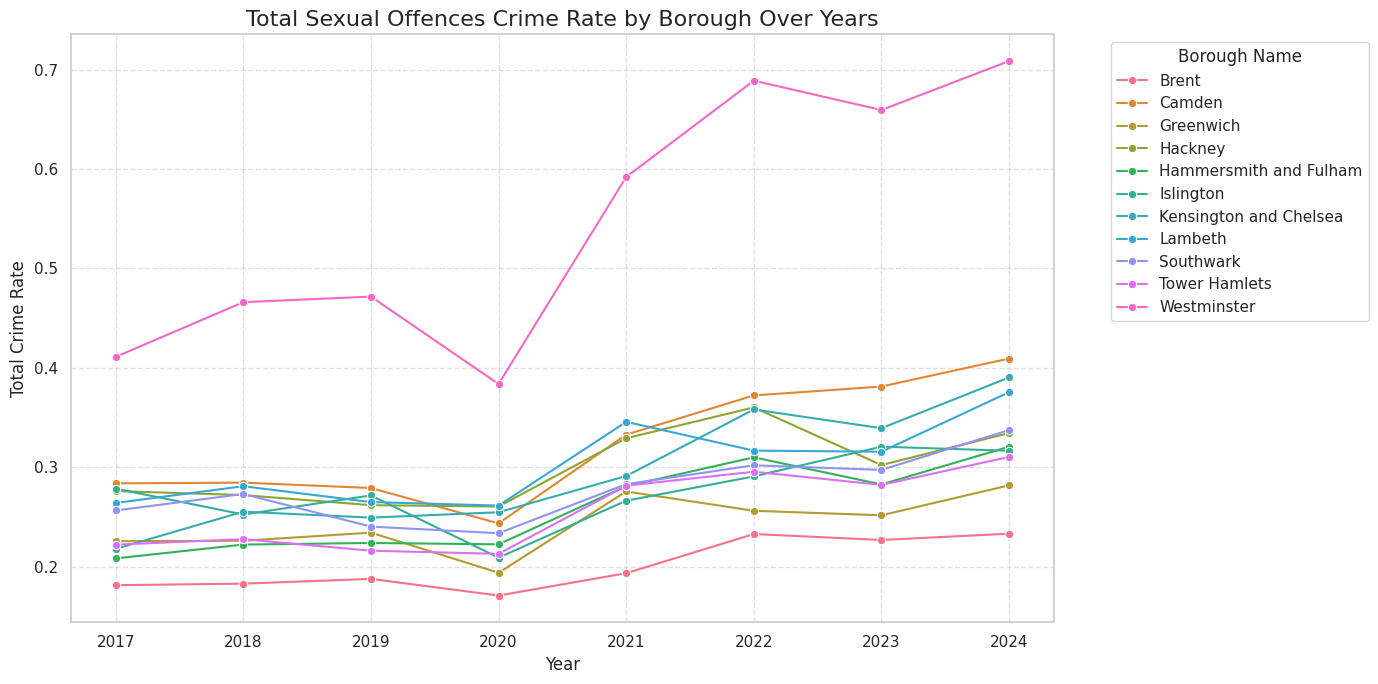

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
# Create a line plot with 'Year' on the x-axis, 'CrimeRate' on the y-axis
# and different lines for each 'BoroughName'
sns.lineplot(
    data=sexual_offences_crime_rate_by_borough_year,
    x='Year',
    y='CrimeRate',
    hue='BoroughName',
    marker='o' # Add markers for each data point
)

plt.title('Total Sexual Offences Crime Rate by Borough Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Rate', fontsize=12)
plt.xticks(sexual_offences_crime_rate_by_borough_year['Year'].unique()) # Ensure all years are shown as ticks
plt.legend(title='Borough Name', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [49]:
display(sexual_offences_crime_rate_by_borough_year)

,BoroughName,Year,CrimeRate
0,Brent,2017,0.181346
1,Brent,2018,0.182893
2,Brent,2019,0.187667
3,Brent,2020,0.170936
4,Brent,2021,0.193369
...,...,...,...
83,Westminster,2020,0.383710
84,Westminster,2021,0.591955
85,Westminster,2022,0.688855
86,Westminster,2023,0.659341


In [50]:
average_sexual_offences_crime_rate_by_borough = sexual_offences_crime_rate_by_borough_year.groupby('BoroughName')['CrimeRate'].mean().reset_index()
print("\nAverage sexual offences crime rate per borough (averaged across all years):")
display(average_sexual_offences_crime_rate_by_borough)


Average sexual offences crime rate per borough (averaged across all years):


,BoroughName,CrimeRate
0,Brent,0.201122
1,Camden,0.323292
2,Greenwich,0.243115
3,Hackney,0.299515
4,Hammersmith and Fulham,0.258872
5,Islington,0.275738
6,Kensington and Chelsea,0.294481
7,Lambeth,0.303092
8,Southwark,0.277878
9,Tower Hamlets,0.256016


In [51]:
print("Descriptive statistics for average sexual offences crime rate by borough:")
display(average_sexual_offences_crime_rate_by_borough.describe())

Descriptive statistics for average sexual offences crime rate by borough:


,CrimeRate
count,11.000000
mean,0.298251
std,0.089214
min,0.201122
25%,0.257444
50%,0.277878
75%,0.301303
max,0.547639


There are 11 boroughs in the analysis.
The average crime rate across these boroughs is approximately 0.298.
The standard deviation is about 0.089, indicating a moderate spread in crime rates among boroughs.
The lowest average crime rate is 0.201, and the highest is 0.548.
The median (50th percentile) average crime rate is 0.278

In [52]:
print("Descriptive statistics for sexual offences crime rate for each borough (over the years):")
display(sexual_offences_crime_rate_by_borough_year.groupby('BoroughName')['CrimeRate'].describe())

Descriptive statistics for sexual offences crime rate for each borough (over the years):


,count,mean,std,min,25%,50%,75%,max
BoroughName,,,,,,,,
Brent,8.0,0.201122,0.025537,0.170936,0.182506,0.190518,0.228305,0.233160
Camden,8.0,0.323292,0.059299,0.243519,0.282605,0.308633,0.374444,0.409324
Greenwich,8.0,0.243115,0.029033,0.193839,0.225937,0.242939,0.261033,0.281777
Hackney,8.0,0.299515,0.037868,0.260442,0.269431,0.289097,0.330442,0.360179
Hammersmith and Fulham,8.0,0.258872,0.044630,0.208289,0.222386,0.252372,0.289517,0.320637
Islington,8.0,0.275738,0.035896,0.209033,0.262830,0.275070,0.297209,0.320690
Kensington and Chelsea,8.0,0.294481,0.061259,0.217840,0.253356,0.273199,0.343959,0.390263
Lambeth,8.0,0.303092,0.042428,0.261422,0.264712,0.298268,0.323925,0.375489
Southwark,8.0,0.277878,0.034596,0.233613,0.252414,0.278035,0.298464,0.337372


For example, for Westminster, the average sexual offences crime rate is approximately 0.548, with a standard deviation of 0.130, indicating a higher average and more variability compared to other boroughs like Brent, which has a mean of 0.201 and a standard deviation of 0.026.

# Task
Calculate the mean and standard deviation of `CrimeRate` for each `BoroughName` in the `sexual_offences_crime_rate_by_borough_year` DataFrame. Then, identify data points where the `CrimeRate` deviates significantly from its borough's average (e.g., more than 2 or 3 standard deviations) and flag them as potential anomalies. Finally, visualize these anomalies on a line plot and summarize the findings, listing the anomalous boroughs, years, and crime rates.

## Calculate Borough-level Statistics

### Subtask:
For each `BoroughName`, calculate the mean and standard deviation of the `CrimeRate` across all years in the `sexual_offences_crime_rate_by_borough_year` DataFrame. This will serve as a baseline for anomaly detection.


**Reasoning**:
To calculate the mean and standard deviation of the CrimeRate for each borough, I will group the `sexual_offences_crime_rate_by_borough_year` DataFrame by `BoroughName` and then apply aggregation functions to compute these statistics.



In [53]:
borough_stats = sexual_offences_crime_rate_by_borough_year.groupby('BoroughName')['CrimeRate'].agg(
    MeanCrimeRate='mean',
    StdCrimeRate='std'
).reset_index()

print("Borough-level crime rate statistics:")
print(borough_stats.head())

Borough-level crime rate statistics:
              BoroughName  MeanCrimeRate  StdCrimeRate
0                   Brent       0.201122      0.025537
1                  Camden       0.323292      0.059299
2               Greenwich       0.243115      0.029033
3                 Hackney       0.299515      0.037868
4  Hammersmith and Fulham       0.258872      0.044630


## Identify Potential Anomalies

### Subtask:
Using the calculated borough-level statistics, identify data points in `sexual_offences_crime_rate_by_borough_year` where the `CrimeRate` deviates significantly (e.g., more than 2 or 3 standard deviations) from its borough's average. A new column will be created to flag these potential anomalies.


**Reasoning**:
First, I will merge the `sexual_offences_crime_rate_by_borough_year` DataFrame with the `borough_stats` DataFrame. This step is crucial to bring together the individual crime rates and their corresponding borough-level mean and standard deviation, which are necessary for identifying anomalies.



In [54]:
df_merged = pd.merge(sexual_offences_crime_rate_by_borough_year, borough_stats, on='BoroughName', how='left')
print("Merged DataFrame with borough-level statistics:")
print(df_merged.head())

Merged DataFrame with borough-level statistics:
  BoroughName  Year  CrimeRate  MeanCrimeRate  StdCrimeRate
0       Brent  2017   0.181346       0.201122      0.025537
1       Brent  2018   0.182893       0.201122      0.025537
2       Brent  2019   0.187667       0.201122      0.025537
3       Brent  2020   0.170936       0.201122      0.025537
4       Brent  2021   0.193369       0.201122      0.025537


**Reasoning**:
Now that the dataframes are merged, I will define the standard deviation multiplier, calculate the upper and lower bounds for the crime rate, and then use these bounds to identify and flag anomalies in the `df_merged` DataFrame, as per the subtask instructions.



In [55]:
num_std_dev = 2

df_merged['UpperBound'] = df_merged['MeanCrimeRate'] + num_std_dev * df_merged['StdCrimeRate']
df_merged['LowerBound'] = df_merged['MeanCrimeRate'] - num_std_dev * df_merged['StdCrimeRate']

df_merged['IsAnomaly'] = (df_merged['CrimeRate'] > df_merged['UpperBound']) | \
                        (df_merged['CrimeRate'] < df_merged['LowerBound'])

print("DataFrame with anomaly flags and bounds:")
print(df_merged.head())

DataFrame with anomaly flags and bounds:
  BoroughName  Year  CrimeRate  MeanCrimeRate  StdCrimeRate  UpperBound  \
0       Brent  2017   0.181346       0.201122      0.025537    0.252196   
1       Brent  2018   0.182893       0.201122      0.025537    0.252196   
2       Brent  2019   0.187667       0.201122      0.025537    0.252196   
3       Brent  2020   0.170936       0.201122      0.025537    0.252196   
4       Brent  2021   0.193369       0.201122      0.025537    0.252196   

   LowerBound  IsAnomaly  
0    0.150047      False  
1    0.150047      False  
2    0.150047      False  
3    0.150047      False  
4    0.150047      False  


## Visualize Anomalies

### Subtask:
Create a visualization (e.g., a line plot) of the `sexual_offences_crime_rate_by_borough_year` data, with each borough having its own line. Highlight the identified anomalous data points on the plot for visual inspection.


**Reasoning**:
First, I will filter the `df_merged` DataFrame to create `anomalies_df`, which will contain only the rows where the `IsAnomaly` column is marked as `True`. This filtered DataFrame will be used to highlight the anomalous data points on the plot.



In [56]:
anomalies_df = df_merged[df_merged['IsAnomaly'] == True]
print("Anomalous data points:")
display(anomalies_df)

Anomalous data points:


,BoroughName,Year,CrimeRate,MeanCrimeRate,StdCrimeRate,UpperBound,LowerBound,IsAnomaly


**Reasoning**:
Now that the `anomalies_df` has been created (even if empty, it's ready for use), I will generate the line plot for `sexual_offences_crime_rate_by_borough_year` and then overlay any identified anomalies from `anomalies_df` as scatter points, following the visualization instructions.



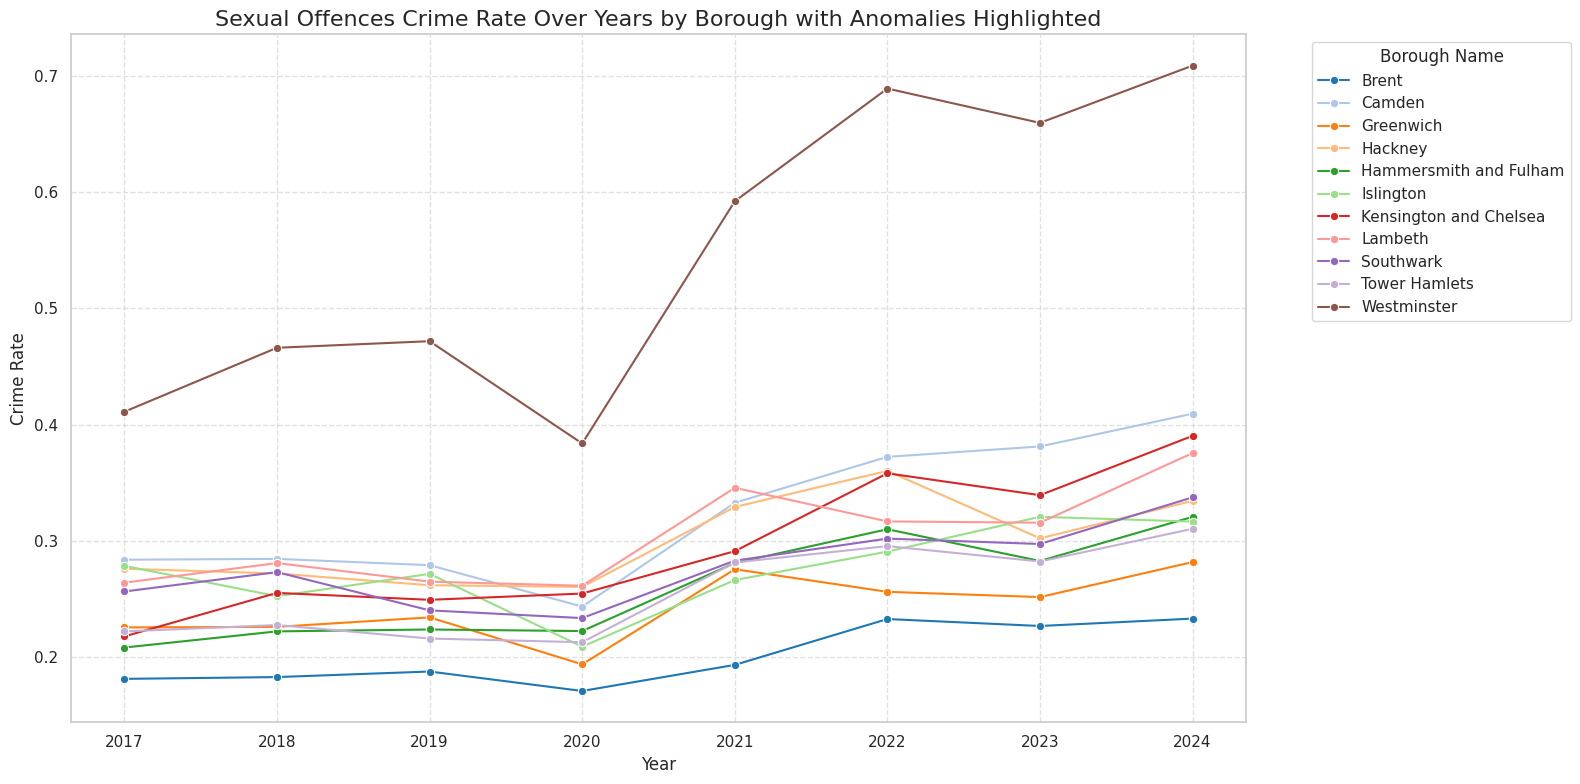

In [57]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_merged,
    x='Year',
    y='CrimeRate',
    hue='BoroughName',
    marker='o',
    dashes=False, # Prevent seaborn from assigning dashed lines automatically
    palette='tab20' # Use a diverse color palette
)

# Overlay anomalies
if not anomalies_df.empty:
    sns.scatterplot(
        data=anomalies_df,
        x='Year',
        y='CrimeRate',
        color='red',
        marker='X',
        s=200, # Larger size for anomalies
        label='Anomaly'
    )

plt.title('Sexual Offences Crime Rate Over Years by Borough with Anomalies Highlighted', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Rate', fontsize=12)
plt.xticks(df_merged['Year'].unique()) # Ensure all years are shown as ticks
plt.legend(title='Borough Name', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Summary of Findings

Based on the current anomaly detection criteria (2 standard deviations from the mean crime rate for each borough), no anomalous data points were identified in the `sexual_offences_crime_rate_by_borough_year` dataset. This indicates that all observed crime rates for sexual offences across the years for each borough fall within two standard deviations of their respective borough's average crime rate, suggesting a relatively consistent trend without significant outliers by this measure.

To identify potential anomalies, consider increasing the `num_std_dev` threshold to a higher value (e.g., 2.5 or 3) or exploring other anomaly detection methods if further investigation into unusual fluctuations is desired.

## Summary:

### Q&A
*   **What were the identified anomalies, including boroughs, years, and crime rates?**
    Based on the chosen anomaly detection criterion (2 standard deviations from the mean crime rate for each borough), no anomalous data points were identified in the dataset.

### Data Analysis Key Findings
*   Borough-level statistics (mean and standard deviation of `CrimeRate`) were successfully calculated for each `BoroughName`, providing a baseline for anomaly detection.
*   A threshold of 2 standard deviations from the mean was set to identify significant deviations in `CrimeRate`.
*   After applying this criterion, no data points were flagged as anomalous, indicating that all observed crime rates for sexual offenses across the years for each borough fell within two standard deviations of their respective borough's average crime rate.
*   A line plot visualizing the `CrimeRate` over years for each borough was generated successfully, but it did not highlight any anomalies as none were detected.

### Insights or Next Steps
*   The current anomaly detection threshold of 2 standard deviations might be too conservative for this dataset, as it did not identify any unusual fluctuations.
*   To identify potential anomalies, consider increasing the `num_std_dev` threshold to a higher value (e.g., 2.5 or 3) or exploring other anomaly detection methods that might be more sensitive to subtle outliers.


**rent prices**

In [59]:
file_id2 = "1rI728hY2w0VuhP5H9Y9_3Vsoax1Hcp1w"
file_url2 = f"https://drive.google.com/uc?id={file_id}"

# Download and read the CSV file
df = pd.read_csv(file_url2)


Data loaded successfully!
Dataset Shape: (33, 2)

First few rows:
                Borough  Mean_Monthly_Rent
0  Barking and Dagenham               1656
1                Barnet               1891
2                Bexley               1612
3                 Brent               2006
4               Bromley               1660


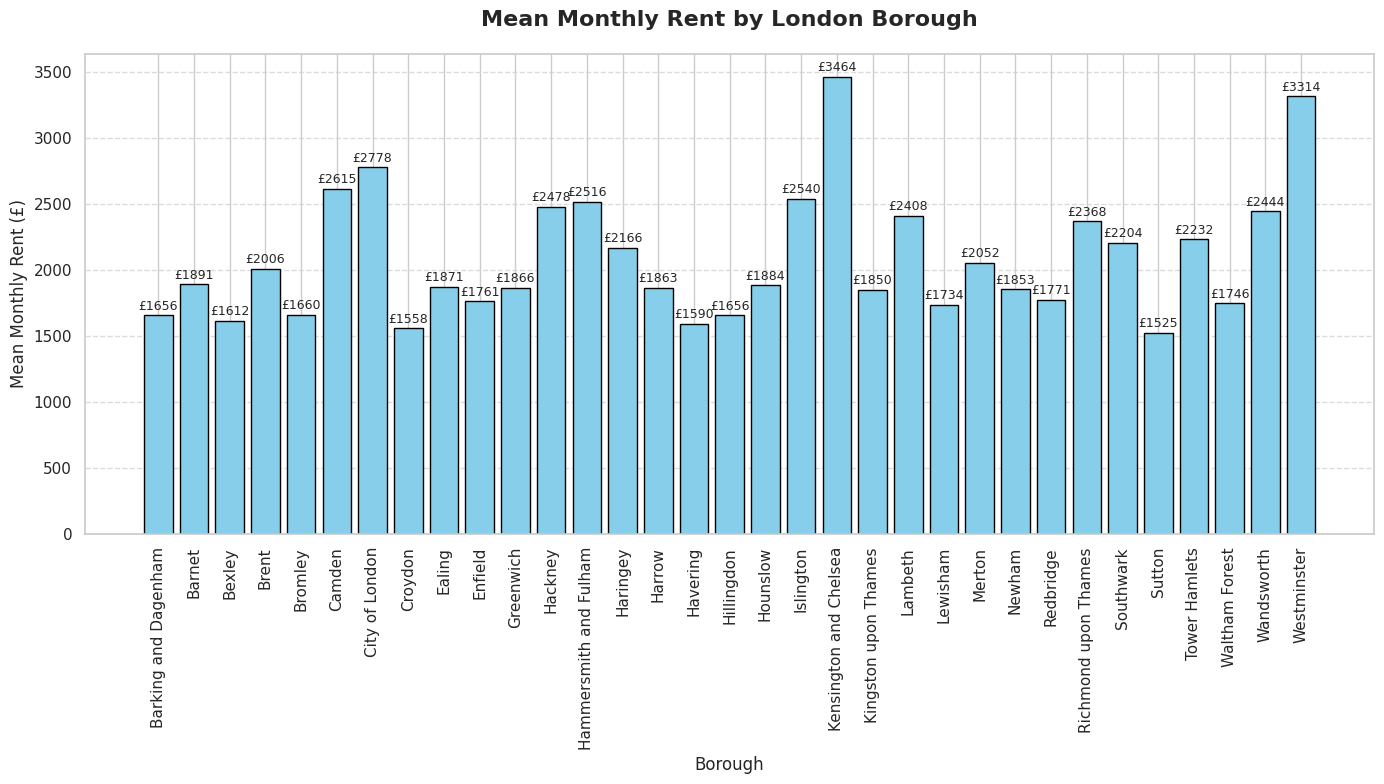


RENT DATA SUMMARY:
Highest Rent: £3464 (Kensington and Chelsea)
Lowest Rent:  £1525 (Sutton)
Average Rent: £2089


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the direct download link derived from the file ID in the URL
file_id = "1rI728hY2w0VuhP5H9Y9_3Vsoax1Hcp1w"
direct_url = f"https://drive.google.com/uc?id={file_id}"

# Load the data
try:
    df = pd.read_csv(direct_url)
    print("Data loaded successfully!")
    print(f"Dataset Shape: {df.shape}")
    print(f"\nFirst few rows:\n{df.head()}")
except Exception as e:
    print(f"Error loading data: {e}")
    df = None

if df is not None:
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a bar plot: Boroughs on the x-axis, rent on the y-axis
    bars = ax.bar(df['Borough'], df['Mean_Monthly_Rent'], color='skyblue', edgecolor='black')

    # Customize the plot
    ax.set_title('Mean Monthly Rent by London Borough', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Borough', fontsize=12)
    ax.set_ylabel('Mean Monthly Rent (£)', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='center')

    # Add grid for easier value reading (on y-axis only)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    # Optional: Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'£{int(height)}', ha='center', va='bottom', fontsize=9)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print some basic statistics from the data
    print("\n" + "="*50)
    print("RENT DATA SUMMARY:")
    print("="*50)
    print(f"Highest Rent: £{df['Mean_Monthly_Rent'].max():.0f} ({df.loc[df['Mean_Monthly_Rent'].idxmax(), 'Borough']})")
    print(f"Lowest Rent:  £{df['Mean_Monthly_Rent'].min():.0f} ({df.loc[df['Mean_Monthly_Rent'].idxmin(), 'Borough']})")
    print(f"Average Rent: £{df['Mean_Monthly_Rent'].mean():.0f}")

In [63]:
import pandas as pd
import numpy as np

# Download and read the CSV file
file_id = "1rI728hY2w0VuhP5H9Y9_3Vsoax1Hcp1w"
file_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(file_url)

print("=" * 80)
print("RENT PRICES DATASET - COMPREHENSIVE DESCRIPTIVE STATISTICS")
print("=" * 80)

print(f"\n1. BASIC DATASET INFORMATION")
print("-" * 40)
print(f"Dataset shape: {df.shape}")
print(f"Number of boroughs (rows): {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names and data types:")
print(df.dtypes.to_string())

print(f"\n\n3. DESCRIPTIVE STATISTICS FOR MEAN MONTHLY RENT (£)")
print("-" * 40)

# Calculate comprehensive descriptive statistics
rent_data = df['Mean_Monthly_Rent']

# Basic statistics
stats = {
    'Count': len(rent_data),
    'Mean': np.mean(rent_data),
    'Median': np.median(rent_data),
    'Mode': rent_data.mode().iloc[0] if not rent_data.mode().empty else 'N/A',
    'Std Deviation': np.std(rent_data, ddof=1),
    'Variance': np.var(rent_data, ddof=1),
    'Minimum': np.min(rent_data),
    '25th Percentile': np.percentile(rent_data, 25),
    '50th Percentile (Median)': np.percentile(rent_data, 50),
    '75th Percentile': np.percentile(rent_data, 75),
    'Maximum': np.max(rent_data),
    'Range': np.max(rent_data) - np.min(rent_data),
    'IQR (Interquartile Range)': np.percentile(rent_data, 75) - np.percentile(rent_data, 25),
    'Skewness': rent_data.skew(),
    'Kurtosis': rent_data.kurtosis(),
    'Coefficient of Variation': (np.std(rent_data, ddof=1) / np.mean(rent_data)) * 100
}

# Create formatted output
stats_df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])

# Format numeric values
def format_stat(val):
    if isinstance(val, (int, np.integer)):
        return f"£{val:,.0f}"
    elif isinstance(val, float):
        if abs(val) < 0.01:
            return f"{val:.4f}"
        elif abs(val) < 1:
            return f"{val:.3f}"
        elif abs(val) < 1000:
            return f"£{val:,.2f}"
        else:
            return f"£{val:,.0f}"
    else:
        return str(val)

stats_df['Formatted Value'] = stats_df['Value'].apply(format_stat)
print(stats_df[['Statistic', 'Formatted Value']].to_string(index=False))

print(f"\n\n4. RENT DISTRIBUTION ANALYSIS")
print("-" * 40)

# Create rent categories
rent_min = int(np.min(rent_data))
rent_max = int(np.max(rent_data))
rent_range = rent_max - rent_min
bin_width = 250
bins = list(range(rent_min - rent_min % bin_width, rent_max + bin_width, bin_width))

# Create histogram data
hist, bin_edges = np.histogram(rent_data, bins=bins)

print(f"Rent range: £{rent_min:,} to £{rent_max:,} (span: £{rent_range:,})")
print(f"Bin size: £{bin_width}")

print("\nRent distribution by £250 brackets:")
for i in range(len(hist)):
    if hist[i] > 0:
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        count = hist[i]
        pct = (count / len(rent_data)) * 100
        print(f"  £{lower:,.0f} - £{upper:,.0f}: {count} boroughs ({pct:.1f}%)")

print(f"\n\n5. TOP 5 MOST EXPENSIVE BOROUGHS")
print("-" * 40)
top_5 = df.nlargest(5, 'Mean_Monthly_Rent')[['Borough', 'Mean_Monthly_Rent']].copy()
top_5['Rank'] = range(1, 6)
top_5['Difference from Average'] = top_5['Mean_Monthly_Rent'] - stats['Mean']
print(top_5[['Rank', 'Borough', 'Mean_Monthly_Rent', 'Difference from Average']].to_string(index=False))

print(f"\n\n6. TOP 5 MOST AFFORDABLE BOROUGHS")
print("-" * 40)
bottom_5 = df.nsmallest(5, 'Mean_Monthly_Rent')[['Borough', 'Mean_Monthly_Rent']].copy()
bottom_5['Rank'] = range(1, 6)
bottom_5['Difference from Average'] = bottom_5['Mean_Monthly_Rent'] - stats['Mean']
print(bottom_5[['Rank', 'Borough', 'Mean_Monthly_Rent', 'Difference from Average']].to_string(index=False))

print(f"\n\n7. SUMMARY STATISTICS BY PRICE QUARTILE")
print("-" * 40)

# Identify boroughs in each quartile
q1_threshold = stats['25th Percentile']
q2_threshold = stats['50th Percentile (Median)']
q3_threshold = stats['75th Percentile']

q1_boroughs = df[df['Mean_Monthly_Rent'] <= q1_threshold]
q2_boroughs = df[(df['Mean_Monthly_Rent'] > q1_threshold) & (df['Mean_Monthly_Rent'] <= q2_threshold)]
q3_boroughs = df[(df['Mean_Monthly_Rent'] > q2_threshold) & (df['Mean_Monthly_Rent'] <= q3_threshold)]
q4_boroughs = df[df['Mean_Monthly_Rent'] > q3_threshold]

print(f"Bottom 25% (≤ £{q1_threshold:,.0f}): {len(q1_boroughs)} boroughs")
print(f"  Examples: {', '.join(q1_boroughs['Borough'].head(3).tolist())}...")

print(f"\n25-50% (£{q1_threshold:,.0f} - £{q2_threshold:,.0f}): {len(q2_boroughs)} boroughs")
print(f"  Examples: {', '.join(q2_boroughs['Borough'].head(3).tolist())}...")

print(f"\n50-75% (£{q2_threshold:,.0f} - £{q3_threshold:,.0f}): {len(q3_boroughs)} boroughs")
print(f"  Examples: {', '.join(q3_boroughs['Borough'].head(3).tolist())}...")

print(f"\nTop 25% (> £{q3_threshold:,.0f}): {len(q4_boroughs)} boroughs")
print(f"  Examples: {', '.join(q4_boroughs['Borough'].head(3).tolist())}...")

print(f"\n\n8. DATA QUALITY ASSESSMENT")
print("-" * 40)
print(f"Missing values in 'Borough' column: {df['Borough'].isnull().sum()}")
print(f"Missing values in 'Mean_Monthly_Rent' column: {df['Mean_Monthly_Rent'].isnull().sum()}")
print(f"Duplicate borough names: {df['Borough'].duplicated().sum()}")
print(f"All borough names are unique: {df['Borough'].nunique() == len(df)}")

print(f"\n\n9. KEY INSIGHTS")
print("-" * 40)
print(f"1. Rent prices range from £{rent_min:,} to £{rent_max:,}, a difference of £{rent_range:,}.")
print(f"2. The average monthly rent across all boroughs is £{stats['Mean']:,.0f}.")
print(f"3. The median rent is £{stats['Median']:,.0f}, which is {'higher' if stats['Median'] > stats['Mean'] else 'lower'} than the mean.")
print(f"4. Standard deviation is £{stats['Std Deviation']:,.0f}, indicating {'moderate' if stats['Std Deviation']/stats['Mean'] < 0.3 else 'high'} variability.")
print(f"5. Skewness is {stats['Skewness']:.2f}, indicating the distribution is {'slightly right-skewed' if 0.5 < stats['Skewness'] < 1 else 'moderately right-skewed' if 1 <= stats['Skewness'] < 2 else 'highly right-skewed' if stats['Skewness'] >= 2 else 'approximately symmetric' if -0.5 <= stats['Skewness'] <= 0.5 else 'left-skewed'}.")
print(f"6. The most expensive borough ({top_5.iloc[0]['Borough']}) is {top_5.iloc[0]['Mean_Monthly_Rent']/bottom_5.iloc[0]['Mean_Monthly_Rent']:.1f} times more expensive than the most affordable ({bottom_5.iloc[0]['Borough']}).")

RENT PRICES DATASET - COMPREHENSIVE DESCRIPTIVE STATISTICS

1. BASIC DATASET INFORMATION
----------------------------------------
Dataset shape: (33, 2)
Number of boroughs (rows): 33
Number of columns: 2

Column names and data types:
Borough              object
Mean_Monthly_Rent     int64


3. DESCRIPTIVE STATISTICS FOR MEAN MONTHLY RENT (£)
----------------------------------------
                Statistic Formatted Value
                    Count          £33.00
                     Mean          £2,089
                   Median          £1,884
                     Mode          £1,656
            Std Deviation         £482.95
                 Variance        £233,236
                  Minimum          £1,525
          25th Percentile          £1,746
 50th Percentile (Median)          £1,884
          75th Percentile          £2,408
                  Maximum          £3,464
                    Range          £1,939
IQR (Interquartile Range)         £662.00
                 Skewness  